In [84]:
import numpy
from numpy import pi, sin, zeros, r_
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from skimage.color import rgb2gray
from skimage import data

%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 7.0)

In [85]:
def imshow(img):
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')

    # Evitar numeros en los bordes
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

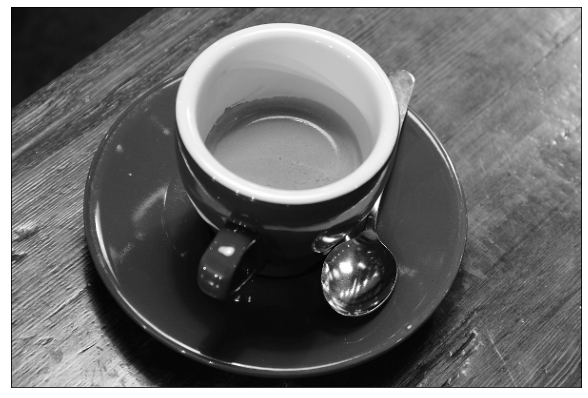

In [86]:
im = rgb2gray(data.coffee().astype('float'))
imshow(im)

# DFT
Comprimir no es más que quedarnos con las componentes que más energía tienen. Cuando se aumenta el tamaño de la máscara de la DFT aumenta la velocidad y conforme la disminuimos aumenta.
* Aumentar la tamaño mascara de la DFT aumenta el nivel de compresión.
* Aumentar el umbral también aumenta el nivel de compresión, ya que disminuye el nº de componentes que pasan el filtro, restringimos estás.

Image size: (400, 600)
Dft size: 512 X 512
Posición donde calcularemos la DFT, donde se calculará cada coeficiente:
[  0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68
  72  76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140
 144 148 152 156 160 164 168 172 176 180 184 188 192 196 200 204 208 212
 216 220 224 228 232 236 240 244 248 252 256 260 264 268 272 276 280 284
 288 292 296 300 304 308 312 316 320 324 328 332 336 340 344 348 352 356
 360 364 368 372 376 380 384 388 392 396]
(400, 600)
Manteniendo el 21.90375 de los coeficientes de la DFT.


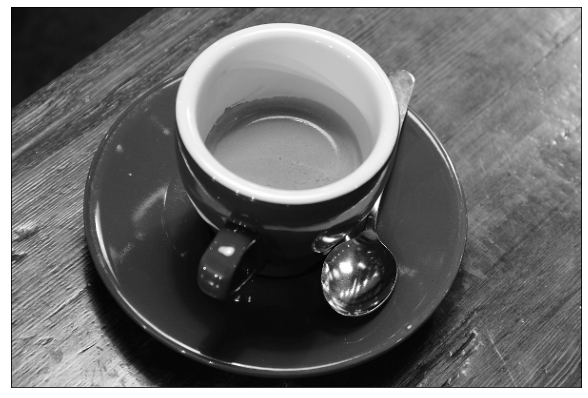

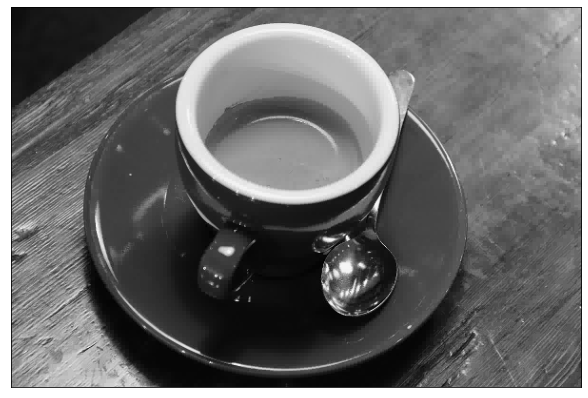

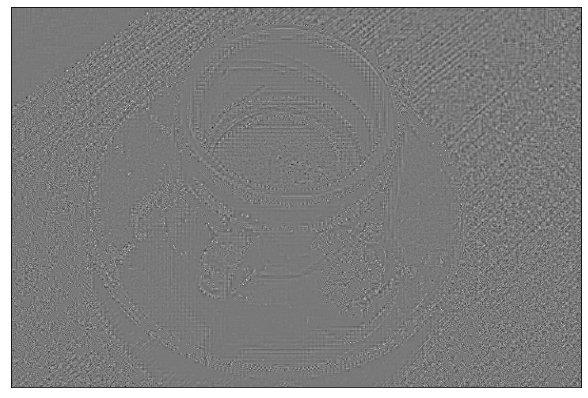

In [98]:
imsize = im.shape
dft = zeros(imsize, dtype='complex') # DFT
im_dft = zeros(imsize, dtype='complex') # DFT inversa

print('Image size:',imsize)
print('Dft size:', dft_size, 'X', dft_size)

# Posiciones donde se centraremos la mascara de la dft, 


dft_size = 4
print('Posición donde calcularemos la DFT, donde se calculará cada coeficiente:')
print(numpy.array(range(0, imsize[0], dft_size)))
for i in range(0, imsize[0], dft_size):
    for j in range(0, imsize[1], dft_size):
        # Cogemos las region que va desde i hasta i + dft_size
        # Cogemos las region que va desde j hasta j + dft_size
        # Cuadrado dft_size x dft_size
        dft[i:(i + dft_size), j:(j + dft_size)] = numpy.fft.fft2(im[i:(i + dft_size), j:(j + dft_size)])

umbral = 0.013

# Obtenemos que coeficiente supera el umbral.
# Matriz de booleanos
dft_umbral_boolean = abs(dft) > (umbral * numpy.max(abs(dft)))

# Multiplicamos por 1 o 0. Es decir, nos quedamos solo con los que superar
dft_umbral = dft * dft_umbral_boolean
print(dft.shape)

total = float(imsize[0] * imsize[1])
percent = numpy.sum(dft_umbral_boolean)/ total
print(f"Manteniendo el {percent * 100.0} de los coeficientes de la DFT.")


for i in range(0, imsize[0], dft_size):
    for j in range(0, imsize[1], dft_size):
        # Cogemos las region que va desde i hasta i + 4
        # Cogemos las region que va desde j hasta j + 4
        # Cuadrado 4 x 4
        im_dft[i:(i + dft_size), j:(j + dft_size)] = numpy.fft.ifft2(dft_umbral[i:(i + dft_size), j:(j + dft_size)])
imshow(im)       
imshow(abs(im_dft))
imshow(im - abs(im_dft))